In [1]:
import pickle

directory = './boc/formatted/'

import glob

#dictionary where key is the dataset name, and the scores and features for that dataset are the values
results = {}

for filename in glob.glob(directory + '*CV_results.pkl'):
    filehandle = open(filename)
    
    (scores, features) = pickle.load(filehandle)
    
    filehandle.close()
    
    results[filename[16:25]] = (scores, features)

    print filename

./boc/formatted/51069898850_CV_results.pkl
./boc/formatted/50568791250_CV_results.pkl
./boc/formatted/50652069650_CV_results.pkl
./boc/formatted/50386627650_CV_results.pkl
./boc/formatted/50569624850_CV_results.pkl
./boc/formatted/50951757750_CV_results.pkl
./boc/formatted/50377225350_CV_results.pkl
./boc/formatted/50450810450_CV_results.pkl
./boc/formatted/51214574550_CV_results.pkl
./boc/formatted/50225433050_CV_results.pkl
./boc/formatted/50653992750_CV_results.pkl
./boc/formatted/50730491050_CV_results.pkl
./boc/formatted/51051806650_CV_results.pkl


In [2]:
filename[16:25]

'510518066'

In [12]:
import numpy as np

#first let's just make some aggregate statistics

non_linearity = ['exp', 'sigmoid', 'relu']
noise_model = ['exponential', 'gaussian']

best_noise_model = []
best_non_linearity = []

likelihood_exponential = []
likelihood_gaussian = []

for key in results.keys():
    
    scores, _ = results[key]
    
    n_cells, n_nl, n_nm = scores.shape
    
    for i in range(n_cells):
        idx = np.argmin(scores[i])
        
        nl_ind, nm_ind = np.unravel_index(idx, (n_nl, n_nm))
        
        if scores[i, nl_ind, nm_ind] != np.nan:
            best_noise_model.append(nm_ind)
            best_non_linearity.append(nl_ind)


            if nm_ind == 0:
                likelihood_exponential.append(scores[i, nl_ind, nm_ind])

            if nm_ind == 1:
                likelihood_gaussian.append(scores[i, nl_ind, nm_ind])

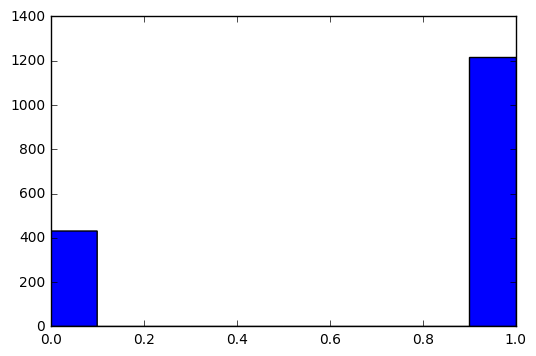

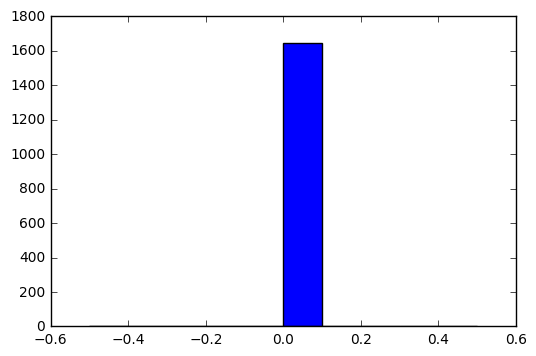

In [4]:

import matplotlib.pyplot as plt



best_noise_model = np.array(best_noise_model)
best_non_linearity = np.array(best_non_linearity)

plt.hist(best_noise_model)
plt.show()
plt.hist(best_non_linearity)
plt.show()

In [5]:
print sum(best_non_linearity == 0), sum(best_non_linearity == 1), sum(best_non_linearity == 2)

1646 0 0


In [6]:
for j, nm in enumerate(noise_model):
    for k, nl in enumerate(non_linearity):
        print nm, nl

exponential exp
exponential sigmoid
exponential relu
gaussian exp
gaussian sigmoid
gaussian relu


0 0


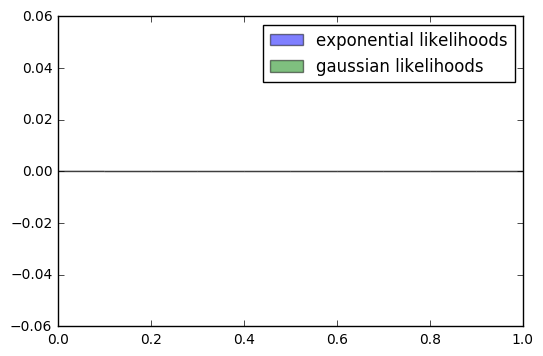

In [8]:

le = -np.array(likelihood_exponential)
le = le[~np.isnan(le)]
lg = -np.array(likelihood_gaussian)
lg = lg[~np.isnan(lg)]

print len(le), len(lg)

#bins = np.linspace(-6000, 20000, 50)

plt.hist(le, alpha = .5, label = "exponential likelihoods")
plt.hist(lg, alpha = .5, label = "gaussian likelihoods")
plt.legend()
plt.show()

In [34]:
from glm_utils import *

In [ ]:
#let's iterate through keys, get the data, check R^2
from glm_utils import *
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from sklearn.linear_model import LinearRegression

nl_dic = {0:np.exp, 1:sigmoid, 2:relu }
corrs = []
likelihood = []

for key in results.keys()[0:10]:
    
    boc = BrainObservatoryCache(manifest_file='boc/manifest.json') 
    data_set = boc.get_ophys_experiment_data(int(key))
    dff_traces, images, stim_table = get_data(data_set, stim_info.NATURAL_SCENES)
    
    images = pca_features(images)
    
    #and a list for the stimulus
    data = []
    stim_array = []

    #average each trace over the presentation of each stimulus
    for index, row in stim_table.iterrows():
        stim_array.append(images[row.frame])
        data.append(np.mean(dff_traces[:, row['start']:row['end'] ], axis = 1) )

    stim_array = np.array(stim_array)
    stim_array = stim_array[:, 0:50]

    data = np.array(data)
    
    scores, features = results[key]
    
    n_cells, n_nl, n_nm = scores.shape
    
    for i in range(n_cells):
        idx = np.argmin(scores[i])
        
        nl_ind, nm_ind = np.unravel_index(idx, (n_nl, n_nm))
        
        if scores[i, nl_ind, nm_ind] != np.nan:
            
            w = features[i, nl_ind, nm_ind, 0:-2]
            o = features[i, nl_ind, nm_ind, -2]
            s = features[i, nl_ind, nm_ind, -1]
            
            
            print o, s
            
            con = cond_int(nl_dic[nl_ind], w, stim_array, s, o)
            
            corr = np.corrcoef(con, data[:, i])
            
            corrs.append(corr[1, 1])
            likelihood.append(scores[i, nl_ind, nm_ind])
    

0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan


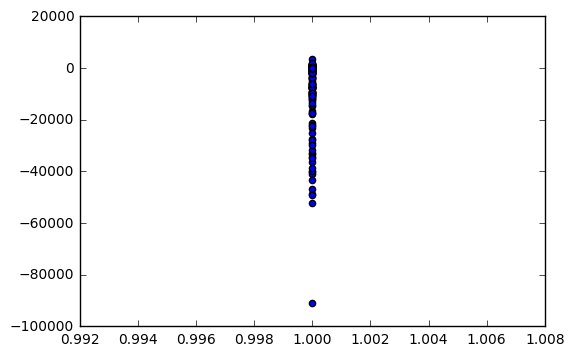

In [97]:
%matplotlib inline

plt.scatter(corrs, likelihood)

In [14]:
score = np.arange(0, 6)
score = score.reshape([2, -1])

In [17]:
score[:, [0]].shape

(2, 1)

In [19]:
data = np.arange(0, 10)
data = data.reshape([2, -1])

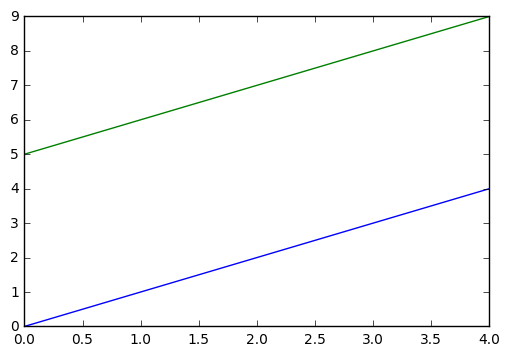

In [23]:
%matplotlib inline
plt.plot(data.T)

In [22]:
data

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [25]:
data.T.shape

(5, 2)

In [26]:
data = data.reshape(10, -1)

In [27]:
data

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])